importing Jupyter notebook from ReedsShepp.ipynb
importing Jupyter notebook from vehicle.ipynb
importing Jupyter notebook from utils.ipynb


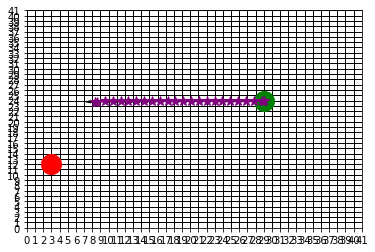

In [2]:
import import_ipynb #Allows you to import ipynb files
import turtle
import numpy as np
from ReedsShepp import ReedsSheppAction
from vehicle import *

In [3]:
class Drawer:
    #resolution = measure of one centimeter
    def __init__(self, vehicle:Vehicle=None, resolution:int = 10):
        self.resolution = resolution
        self.vehicle = vehicle
        
        self.screen = turtle.Screen()
        self.screen.setup(width=900, height=900)
        
        self.car = turtle.Turtle()
        self.car.speed(1)
        self.car.shape('turtle')
        self.car.resizemode('user')
        self.car.pencolor('black')
        #regular turtle 18 x 23 pixels
        self.car.shapesize(self.vehicle.width/18*resolution,self.vehicle.length/23*resolution)
        
    def setSpeed(self, speed):
        self.car.speed(speed)
        
    def setPositionandAngle(self, position:tuple = (0,0), angle:float=0.0):
        self.car.up()
        self.car.setpos(self.resolution*position[0], self.resolution*position[1])
        self.car.setheading(angle)
        self.car.down()
        
    def drawVectorArrow(self):
        self.car.down()
        self.car.pensize(4)
        self.car.forward(self.resolution*.65)
        self.car.right(40)
        self.car.backward(self.resolution*.5)
        self.car.forward(self.resolution*.5)
        self.car.left(80)
        self.car.backward(self.resolution*.5)
        self.car.forward(self.resolution*.5)
        self.car.right(40)
        self.car.pensize(1)
        self.car.up()
        
    def finish(self):
        turtle.done()
        
    def drawPath(self, path):
        for segment in path:
            gear = 1 if segment.Gear == Gear.Forward else -1
            if segment.Steer == Steer.Left:
                self.car.circle(self.resolution, gear * np.rad2deg(segment.Length))
            elif segment.Steer == Steer.Right:
                self.car.circle(- self.resolution, gear * np.rad2deg(segment.Length))
            elif segment.Steer == Steer.Straight:
                self.car.forward(gear * self.resolution*segment.Length)
        
    def drawGrid(self, numCols, numRows):
        grid = turtle.Turtle(visible=False)
        grid.speed(0)
        grid.dot()  # visualize origin
        grid.penup()
        cellsize = self.resolution*2
        grid.goto(-cellsize * numCols / 2, cellsize * (numRows / 2 - 1))

        for _ in range(numCols - 1):
            grid.pendown()
            grid.forward(numCols * cellsize)
            grid.penup()
            grid.goto(-cellsize * numCols / 2, grid.ycor() - cellsize)

        grid.goto(-cellsize * (numCols / 2 - 1), cellsize * numCols / 2)

        grid.setheading(270)

        for _ in range(numRows - 1):
            grid.pendown()
            grid.forward(numRows * cellsize)
            grid.penup()
            grid.goto(grid.xcor() + cellsize, cellsize * numRows / 2)
        
        grid.goto(-cellsize * numRows / 2, cellsize * ((numRows+2) / 2 - 1))
        grid.pendown()
        grid.setheading(0)
        grid.forward(numCols * cellsize)
        grid.setheading(270)
        grid.forward(numRows * cellsize)
        grid.setheading(180)
        grid.forward(numCols * cellsize)
        grid.setheading(90)
        grid.forward(numRows * cellsize)
        grid.setheading(0)
        
    def addObstacle(self, x, y):
        pass
    def removeObsacle(self, x, y):
        pass